# Bayesianness

Importing the necessary modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import minimize

Code used to fit a model to data I nicked from a previous bit of work I did.

In [2]:
def Model(x, m, c):
    return m*x + c

def minus_log_likelihood(params, x_data, y_data):
    m, c, σ = params[0], params[1], params[2]
    running_total = 0
    for k in range(len(x_data)):
        running_total += (y_data[k] - Model(x_data[k], m, c))**2
    return len(x_data)/2*np.log(2*np.pi*σ**2) + (2*σ**2)**-1*running_total

Creating a random set of numbers normally distributed and inputting it into y. A model is then created for this set of data.

In [3]:
x = np.random.randn(20)
m, c = 2, 3
noise = np.random.randn(20)
y = Model(x, m, c + noise)

In [4]:
x0 = [1, 1, 1]
minimising = minimize(minus_log_likelihood, x0, args=(x, y))
params = minimising.x[0], minimising.x[1]

In [5]:
Output_x = np.linspace(min(x), max(x), 1000)
Output_y = Model(Output_x, *params)

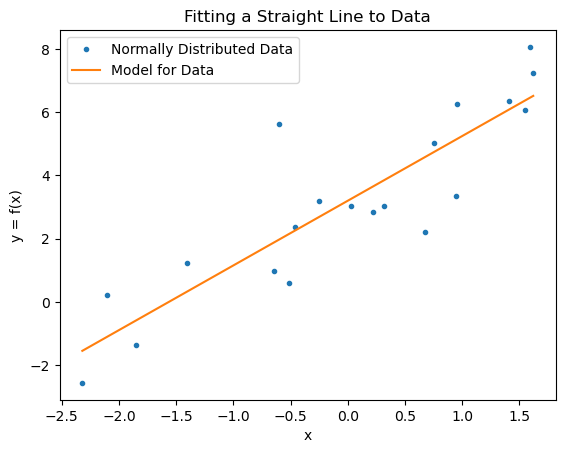

In [6]:
plt.figure()
plt.plot(x, y, '.', label='Normally Distributed Data')
plt.plot(Output_x, Output_y, label='Model for Data')
plt.title('Fitting a Straight Line to Data')
plt.xlabel('x')
plt.ylabel('y = f(x)')
plt.legend()
plt.show()